Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [45]:
#your code here
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from datetime import timedelta

# Establish the connection to the database
db_file_path = '/course/data/CSE-578/dinofunworld.db'
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()


**Question 1 :** 

Make a Pie Chart of the visits to Thrill Ride attractions.

**Note:** 
* For this question, display the pie chart in the notebook and print the data used to create the pie chart as a list of lists (ex: [['Ride 1', 10], ['Ride 2', 100], ...])
* The pie chart must have the below mentioned parameters,
    * labels
    * title named '**Visits to Thrill Ride attractions**'
    * label with one decimal value inside wedges
    * set aspect ratio of the plot to 'equal'.
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


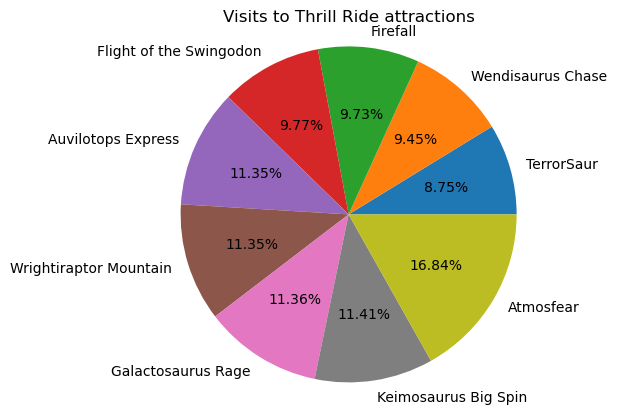

[['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Firefall', 16024], ['Flight of the Swingodon', 16093], ['Auvilotops Express', 18694], ['Wrightiraptor Mountain', 18700], ['Galactosaurus Rage', 18717], ['Keimosaurus Big Spin', 18792], ['Atmosfear', 27747]]


In [46]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

cursor.execute("SELECT attraction.Name, count(checkin.visitorId) as c \
            FROM checkin LEFT JOIN attraction ON checkin.attraction = attraction.AttractionID \
            WHERE LOWER(attraction.Category) LIKE '%thrill%' \
            GROUP BY attraction.Name \
            ORDER BY c;")
count_visits = cursor.fetchall()
visit_stats = pd.DataFrame.from_records(count_visits, columns=['RideName', 'VisitCount'])
plt.pie(visit_stats['VisitCount'], labels=visit_stats['RideName'], autopct='%0.2f%%', shadow=False)
plt.axis('equal')
plt.title('Visits to Thrill Ride attractions')
plt.show()
print(visit_stats.values.tolist())



**Question 2 :** 

Make a bar chart of total visits to food stalls.

**Note:** 
* Please query attractions with category equal to "Food" and order by number of visits.
* For this question, display the bar chart in the notebook and print the data used to create the bar chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...])
* The bar chart should be a **vertical bar plot** and must have the specified parameters listed below,
  * Set x-axis to food stalls, labeling each food stall with names rotated at a 45-degree angle and right horizontal alignment. Set y-axis to number of visits.
  * x-label ('**Food Stalls**') and y-label ('**Number of Visits**')
  * title named '**Total Visits to Food Stalls**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


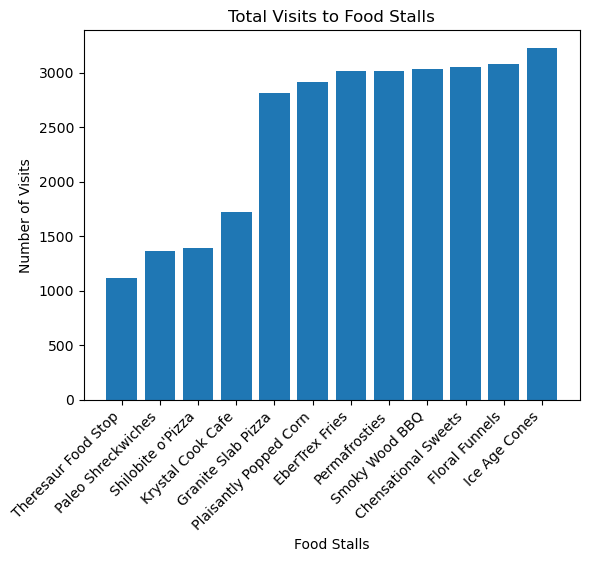

[['Theresaur Food Stop', 1116], ['Paleo Shreckwiches', 1361], ["Shilobite o'Pizza", 1393], ['Krystal Cook Cafe', 1725], ['Granite Slab Pizza', 2810], ['Plaisantly Popped Corn', 2914], ['EberTrex Fries', 3018], ['Permafrosties', 3018], ['Smoky Wood BBQ', 3037], ['Chensational Sweets', 3049], ['Floral Funnels', 3083], ['Ice Age Cones', 3228]]


In [47]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

cursor.execute("""
    SELECT attraction.Name, count(checkin.visitorId) as c
    FROM checkin 
    LEFT JOIN attraction ON checkin.attraction = attraction.AttractionID
    WHERE LOWER(attraction.Category) LIKE '%food%'
    GROUP BY attraction.Name
    ORDER BY c;
""")
count_visits = cursor.fetchall()
visit_stats = pd.DataFrame.from_records(count_visits, columns=['FoodStallName', 'VisitCount'])

# Create the bar chart
plt.bar(range(len(visit_stats['FoodStallName'])), visit_stats['VisitCount'])
plt.ylabel('Number of Visits')
plt.xlabel('Food Stalls')
plt.xticks(
    range(len(visit_stats['FoodStallName'])),
    visit_stats['FoodStallName'],
    rotation=45,  # Rotate x-axis labels by 45 degrees
    ha='right'  # Right horizontal alignment for labels
)
plt.title('Total Visits to Food Stalls')
plt.show()

# Print the data as a list of lists
print(visit_stats.values.tolist())


**Question 3 :** 

Make a line chart of attendance at Atmosfear every five minutes.

**Note:** 
* For this question, use data from the table "sequences". You can assume that all activity sequences are aligned by time (i.e., the first node of all sequences occurred at the same time) and are of the same length.
* You only need to consider the first 16 hours of records in the sequences, which is considered the open hours of the park in one day. Specifically, because an activity sequence from the "sequences" table was updated/recorded every 5 minutes, you need to extract the first 192 items (16h * 60m / 5m = 192).
* Display the line chart in the notebook and print the data used to create the chart as a list of lists or tuple lists 
    * The first item in the list is irrelevant, but you can put in some meaningful information and it should be integer.The second item is the count of visits at that moment. For example, your output should look like this (in Python syntax; not relevant to the correct answer): [ (0, 0), (1, 7), (2, 3), …, (190, 4), (191, 5) ].
* The line chart must have the specified parameters listed below,
  * Set x-axis to the first element in your output list and y-axis to the second item in the list (number of visits)  
  * x-label ('**Time in minutes**') and y-label ('**Number of visits**')
  * title named '**Attendance at Atmosfear every 5 minutes**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

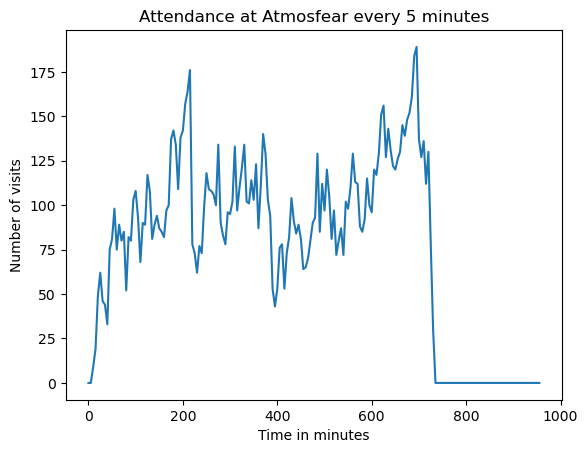

[(0, 0), (5, 0), (10, 9), (15, 19), (20, 49), (25, 62), (30, 46), (35, 44), (40, 33), (45, 75), (50, 81), (55, 98), (60, 75), (65, 89), (70, 80), (75, 85), (80, 52), (85, 82), (90, 80), (95, 103), (100, 108), (105, 93), (110, 68), (115, 90), (120, 89), (125, 117), (130, 108), (135, 81), (140, 89), (145, 94), (150, 87), (155, 85), (160, 82), (165, 97), (170, 100), (175, 137), (180, 142), (185, 134), (190, 109), (195, 138), (200, 142), (205, 157), (210, 164), (215, 176), (220, 78), (225, 73), (230, 62), (235, 77), (240, 73), (245, 99), (250, 118), (255, 109), (260, 108), (265, 106), (270, 100), (275, 134), (280, 90), (285, 83), (290, 78), (295, 96), (300, 95), (305, 102), (310, 133), (315, 97), (320, 110), (325, 121), (330, 134), (335, 102), (340, 101), (345, 114), (350, 103), (355, 123), (360, 87), (365, 111), (370, 140), (375, 129), (380, 103), (385, 94), (390, 53), (395, 43), (400, 53), (405, 76), (410, 78), (415, 53), (420, 73), (425, 82), (430, 104), (435, 91), (440, 84), (445, 89),

In [48]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

import sqlite3
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('/course/data/CSE-578/dinofunworld.db')

# Fetch the AttractionID for 'Atmosfear'
cursor.execute("SELECT attractionId FROM attraction WHERE Name = 'Atmosfear';")
attractionID = cursor.fetchone()[0]

# Query the database to extract sequences for all visitors and calculate attendance at Atmosfear
cursor.execute("""
    SELECT sequence
    FROM sequences
    WHERE sequence LIKE ?
""", ('%' + str(attractionID) + '%',))

# Fetch all sequences for visitors who went on Atmosfear
sequences = cursor.fetchall()

# Calculate attendance counts at each 5-minute interval for the first 192 intervals
attendance_data = []
for i in range(192):  # 16 hours * 12 (5-minute intervals per hour)
    count = sum(1 for seq in sequences if str(attractionID) in seq[0].split('-')[i:i+1])
    attendance_data.append((i * 5, count))  # Store time interval in minutes and corresponding count

# Close the database connection
conn.close()

# Create a line chart
x, y = zip(*attendance_data)
plt.plot(x, y)
plt.xlabel('Time in minutes')
plt.ylabel('Number of visits')
plt.title('Attendance at Atmosfear every 5 minutes')

# Display the line chart
plt.show()

# Print the data used for the line chart
print(attendance_data)



**Question 4:**

Make a box plot of total visits to rides in the Kiddie Rides category.

**Note:** 
* The to-be-printed data list must be ordered by AttractionID (a field in the table "attraction").
* For this question, display the box plot in the notebook and print the number of visits to each ride as a list (ex: [3, 4, 5, 6, ...])
* The boxplot chart must have the specified parameters listed below,
  * Set x-axis to Attraction and y-axis to number of visits to each ride.   
  * x-label ('**Attraction**') and y-label ('**Visitor Count**')
  * title named '**Total visits to rides in the Kiddie Rides category**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

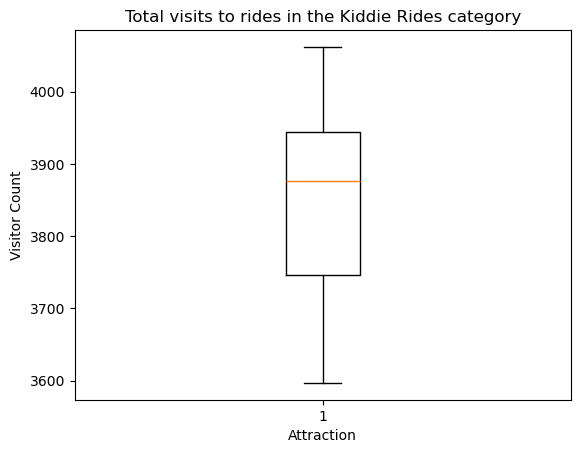

[3597, 3640, 3747, 3747, 3759, 3877, 3922, 3925, 3963, 4022, 4062]


In [49]:
### TEST FUNCTION: test_question4
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

cursor.execute("SELECT attraction.Name, count(checkin.visitorId) as c \
            FROM checkin LEFT JOIN attraction ON checkin.attraction = attraction.AttractionID \
            WHERE LOWER(attraction.Category) LIKE '%kiddie%' \
            GROUP BY attraction.Name \
            ORDER BY c;")
count_visits = cursor.fetchall()
visit_stats = pd.DataFrame.from_records(count_visits, columns=['KiddieRideName', 'VisitCount'])
plt.boxplot(visit_stats['VisitCount'])
plt.xlabel('Attraction')
plt.ylabel('Visitor Count')
plt.title('Total visits to rides in the Kiddie Rides category')
plt.show()
print(visit_stats['VisitCount'].values.tolist())


In [50]:
# Close the database connection
conn.close()
